In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
# Step 1: Install gdown
!pip install gdown

# Step 2: Download file from Google Drive
import gdown

# Google Drive file ID
file_id = '1T1S9OxoA-fva1FLYcBLGf08mctThfBlS'

# Output file path
output = '/tmp/0000-dataset-cat-dog-25000.zip'

# Download the file
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', output, quiet=False)

# Step 3: Extract the ZIP file in /tmp
import zipfile
import os

# Path to the ZIP file in /tmp
local_zip_path = '/tmp/0000-dataset-cat-dog-25000.zip'

# Extract the ZIP file
with zipfile.ZipFile(local_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/tmp/0000-dataset-cat-dog-25000')

# Step 4: Verify the extraction
extracted_path = '/tmp/0000-dataset-cat-dog-25000'
print("Files in extracted directory:")
print(os.listdir(extracted_path))


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1T1S9OxoA-fva1FLYcBLGf08mctThfBlS
From (redirected): https://drive.google.com/uc?export=download&id=1T1S9OxoA-fva1FLYcBLGf08mctThfBlS&confirm=t&uuid=1db699fb-336f-4a9b-a7c2-d3706b3b7dc6
To: /tmp/0000-dataset-cat-dog-25000.zip
100%|██████████| 571M/571M [00:07<00:00, 75.9MB/s]


Files in extracted directory:
['0000-dataset-cat-dog-25000']


# Cat and Dog Classification using ResNet-KAN Method

### Description of Kolmogorov-Arnold Network (KAN)

The paper: https://arxiv.org/abs/2404.19756

The Kolmogorov-Arnold Network (KAN) is a type of artificial neural network based on the Kolmogorov-Arnold Representation Theorem. This network has distinct characteristics in its structure and operation, differing from Multi-Layer Perceptrons (MLPs). KAN features the following:

1. **Kolmogorov-Arnold Representation Theorem**:
   
   ![image.png](attachment:cd64b317-6c43-47aa-87f5-05014c85d2be.png)
   
   
2. **Learnable Activations on Edges**:
   - Unlike MLPs, which have fixed activations on nodes, KAN has learnable activations on edges.

3. **Sum Operation on Nodes**:
   - KAN combines the results of several sum operations performed on nodes.

### Comparison Between KAN and MLP

#### Similarities
- **Both models** can be used for universal approximation of continuous functions.
- **Both models** consist of layers that can be combined to form deep networks.

#### Differences
1. **Activation Structure**:
   - **MLP**: Uses fixed activation functions on nodes.
   - **KAN**: Uses learnable activation functions on edges.

2. **Learning and Operation Locations**:
   - **MLP**: Learnable weights are on the edges between layers, with fixed activation functions.
   - **KAN**: The activation functions themselves are on the edges and learnable, with sum operations on nodes.

3. **Mathematical Formulas**:

   ![image.png](attachment:d928ca85-a804-431d-b09a-ad0a095465f4.png)

4. **Model Visualization**:
   - **MLP Shallow**: Depicted as a network with a single layer of fixed activations on nodes and weights on edges.
   - **KAN Shallow**: Depicted as a network with learnable functions on edges and sum operations on nodes.
   - **MLP Deep**: A network with multiple layers, each layer having weights and fixed activation functions.
   - **KAN Deep**: A network with multiple layers, but the learnable functions are on the edges.

### Conclusion
KAN and MLP are two different approaches to building neural networks with universal approximation capabilities. KAN offers higher flexibility in terms of having learnable activation functions on edges compared to MLPs, which use fixed activation functions on nodes. This makes KAN more adaptive in some cases, although with additional complexity in learning.



<p align="center">
  <a href="url"><img src="https://www.americanhumane.org/app/uploads/2016/08/shutterstock_162633491.jpg" align="middle" height="383" width="640" ></a>
</p>

In [3]:
!nvidia-smi

Fri Jun 14 01:21:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Checking the Directory Cat and Dog

In [4]:
# 000-dataset-catdog-25000
# !ls '/kaggle/input/dog-vs-cat-classification'
# 000-dataset-catdog-25000
!ls '/tmp/0000-dataset-cat-dog-25000/0000-dataset-cat-dog-25000'

train  valid


## Spliting data training and validation

In [5]:
import os

"""
import shutil
from sklearn.model_selection import train_test_split

# Directory with our training cat pictures
train_cat_dir = os.path.join('/kaggle/input/dog-vs-cat-classification/train/train/cats')
# Directory with our training dog pictures
train_dog_dir = os.path.join('/kaggle/input/dog-vs-cat-classification/train/train/dogs')

# Create output directories for training and validation data
output_base_dir = './split_data'
train_cat_output_dir = os.path.join(output_base_dir, 'train/cats')
train_dog_output_dir = os.path.join(output_base_dir, 'train/dogs')
validation_cat_output_dir = os.path.join(output_base_dir, 'validation/cats')
validation_dog_output_dir = os.path.join(output_base_dir, 'validation/dogs')

os.makedirs(train_cat_output_dir, exist_ok=True)
os.makedirs(train_dog_output_dir, exist_ok=True)
os.makedirs(validation_cat_output_dir, exist_ok=True)
os.makedirs(validation_dog_output_dir, exist_ok=True)

# List all cat and dog images
cat_images = os.listdir(train_cat_dir)
dog_images = os.listdir(train_dog_dir)

# Split 2500 images for validation, remaining 10000 for training
cat_train, cat_val = train_test_split(cat_images, test_size=2500, random_state=42)
dog_train, dog_val = train_test_split(dog_images, test_size=2500, random_state=42)

# Move cat images to the appropriate folders
for img in cat_train:
    src = os.path.join(train_cat_dir, img)
    dst = os.path.join(train_cat_output_dir, img)
    shutil.copy(src, dst)

for img in cat_val:
    src = os.path.join(train_cat_dir, img)
    dst = os.path.join(validation_cat_output_dir, img)
    shutil.copy(src, dst)

# Move dog images to the appropriate folders
for img in dog_train:
    src = os.path.join(train_dog_dir, img)
    dst = os.path.join(train_dog_output_dir, img)
    shutil.copy(src, dst)

for img in dog_val:
    src = os.path.join(train_dog_dir, img)
    dst = os.path.join(validation_dog_output_dir, img)
    shutil.copy(src, dst)
"""

# Directory with our training cat pictures
train_cat_dir = os.path.join('/tmp/0000-dataset-cat-dog-25000/0000-dataset-cat-dog-25000/train/cat')

# Directory with our training dog pictures
train_dog_dir = os.path.join('/tmp/0000-dataset-cat-dog-25000/0000-dataset-cat-dog-25000/train/dog')

# Directory with our validation cat pictures
valid_cat_dir = os.path.join('/tmp/0000-dataset-cat-dog-25000/0000-dataset-cat-dog-25000/valid/cat')

# Directory with our validation dog pictures
valid_dog_dir = os.path.join('/tmp/0000-dataset-cat-dog-25000/0000-dataset-cat-dog-25000/valid/dog')

# Verify the split
print(f"Total training cat images: {len(os.listdir(train_cat_dir))}")
print(f"Total training dog images: {len(os.listdir(train_dog_dir))}")
print(f"Total validation cat images: {len(os.listdir(valid_cat_dir))}")
print(f"Total validation dog images: {len(os.listdir(valid_dog_dir))}")


Total training cat images: 9999
Total training dog images: 10000
Total validation cat images: 2500
Total validation dog images: 2500


In [6]:
!ls './split_data'

ls: cannot access './split_data': No such file or directory


In [7]:
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

validation_cat_names = os.listdir(valid_cat_dir)
print(validation_cat_names[:10])

validation_dog_names = os.listdir(valid_dog_dir)
print(validation_dog_names[:10])

['cat.3109.jpg', 'cat.751.jpg', 'cat.4242.jpg', 'cat.925.jpg', 'cat.7908.jpg', 'cat.5273.jpg', 'cat.789.jpg', 'cat.1518.jpg', 'cat.3582.jpg', 'cat.8540.jpg']
['dog.2160.jpg', 'dog.2740.jpg', 'dog.7951.jpg', 'dog.4617.jpg', 'dog.7347.jpg', 'dog.3556.jpg', 'dog.347.jpg', 'dog.9202.jpg', 'dog.4582.jpg', 'dog.1402.jpg']
['cat.10414.jpg', 'cat.10002.jpg', 'cat.12313.jpg', 'cat.10219.jpg', 'cat.10354.jpg', 'cat.10943.jpg', 'cat.11017.jpg', 'cat.11205.jpg', 'cat.10167.jpg', 'cat.11126.jpg']
['dog.11998.jpg', 'dog.12303.jpg', 'dog.11204.jpg', 'dog.11208.jpg', 'dog.11937.jpg', 'dog.12103.jpg', 'dog.11671.jpg', 'dog.11141.jpg', 'dog.11358.jpg', 'dog.10558.jpg']


## Dataset exploration

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

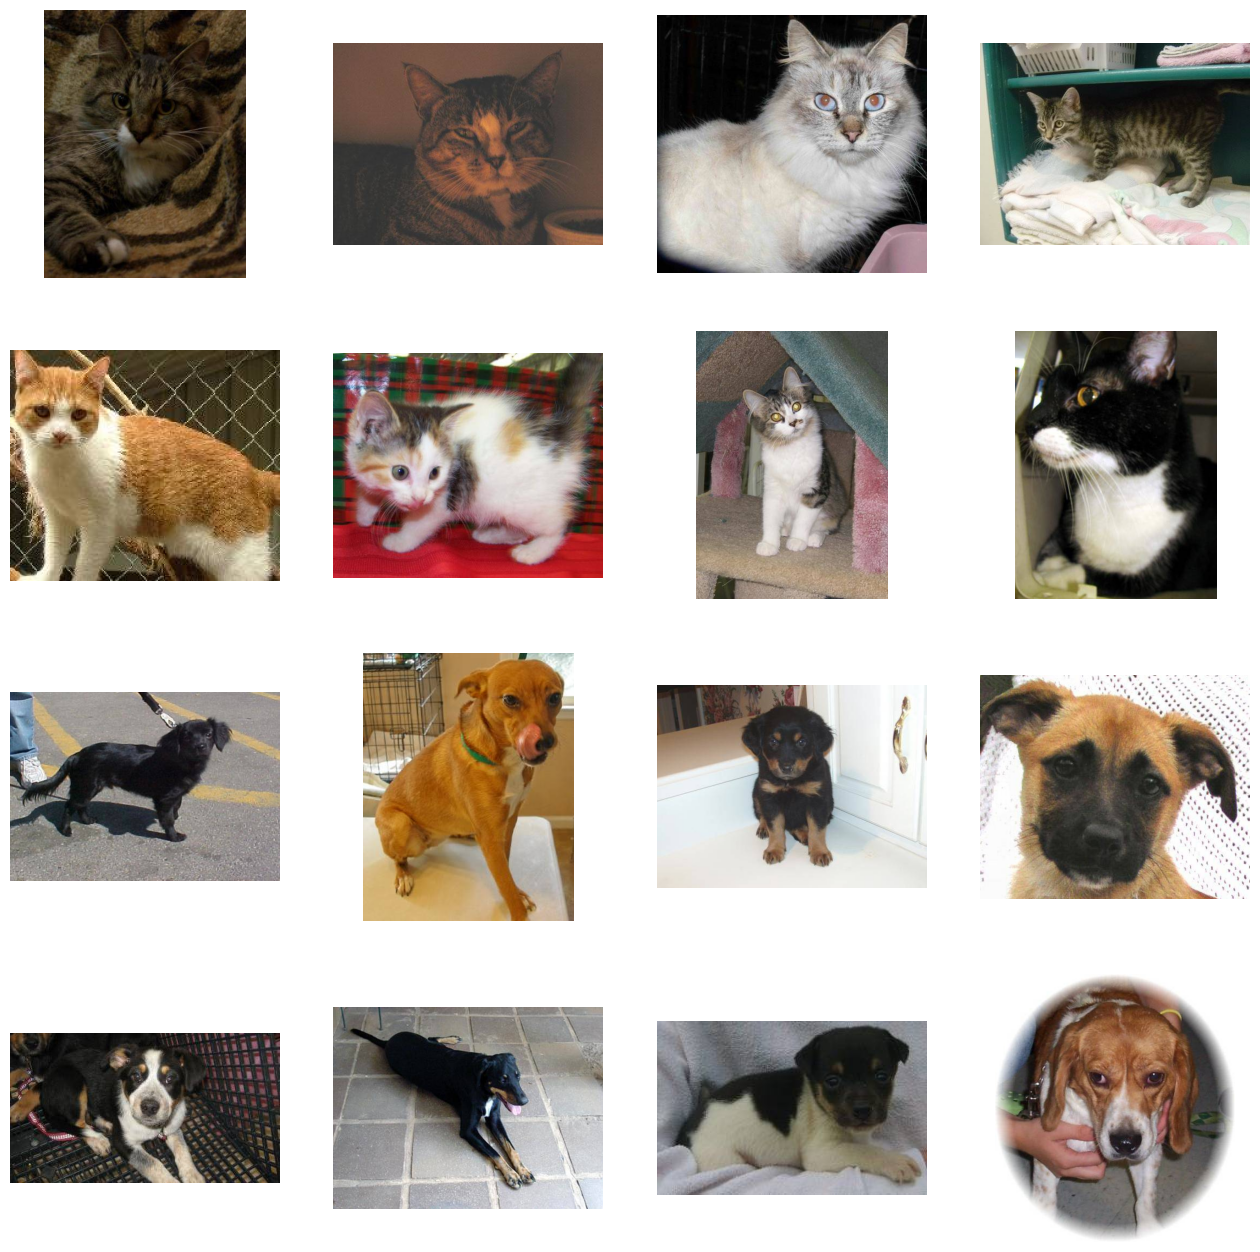

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pic = [os.path.join(train_cat_dir, fname)
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pic = [os.path.join(train_dog_dir, fname)
                for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pic + next_dog_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Install library

In [10]:
!pip install -q torchsummary

## Import Library

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import math
from torchsummary import summary
from sklearn.metrics import classification_report
from torch.optim.lr_scheduler import OneCycleLR
from tqdm import tqdm

### 1. Definition of KANLinear
  - This definition follows the provided source and is used in the CNN-KAN model.

  <p align="center">
  <a href="url"><img src="https://www.marktechpost.com/wp-content/uploads/2024/05/Screenshot-2024-05-04-at-12.59.57-PM.png" align="middle" height="383" width="640" ></a>
</p>

KAN vs MLP Complexity (please correct if there are any errors):

Big O notation measures the time or space complexity of an algorithm in terms of its input. To compare the memory and performance requirements between the Kolmogorov-Arnold Network (KAN) and Multi-Layer Perceptron (MLP), we can look at the components that affect memory usage and computational time for both algorithms.

### Multi-Layer Perceptron (MLP)

MLP usually consists of several layers of neurons, where each neuron in one layer is connected to every neuron in the next layer.

- **Time Complexity (Training):** O(N * M * L * E)
  - N: Number of samples in the dataset
  - M: Number of neurons per layer
  - L: Number of layers
  - E: Number of epochs

- **Space Complexity:** O(M * L + N * F)
  - M: Number of neurons per layer
  - L: Number of layers
  - N: Number of samples in the dataset
  - F: Dimension of input features

### Kolmogorov-Arnold Network (KAN)

KAN uses learnable activation functions at each edge and summation operations at nodes, adding complexity to the model.

- **Time Complexity (Training):** O(N * (M^2) * L * E)
  - N: Number of samples in the dataset
  - M: Number of neurons per layer (since the activation functions are learnable at each edge, there is additional complexity here)
  - L: Number of layers
  - E: Number of epochs

- **Space Complexity:** O(M^2 * L + N * F)
  - M: Number of neurons per layer (with learnable activation functions at each edge, memory requirements increase)
  - L: Number of layers
  - N: Number of samples in the dataset
  - F: Dimension of input features

### Conclusion

From the analysis above, it can be concluded that KAN has higher complexity compared to MLP in terms of both time and space.

1. **Time Complexity:**
   - MLP: O(N * M * L * E)
   - KAN: O(N * M^2 * L * E)

2. **Space Complexity:**
   - MLP: O(M * L + N * F)
   - KAN: O(M^2 * L + N * F)

It can be seen that KAN requires more memory (RAM) during training because it has learnable activation functions at each edge, which significantly increases the number of parameters that need to be stored and processed.

### Class KANLinier

[1] Reference: KAN: https://github.com/Blealtan/efficient-kan/blob/master/src/efficient_kan/kan.py

In [12]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()

    def reset_parameters(self):
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 1 / 2) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


## 2. Model CNNKAN

Reference: CNN-KAN: https://github.com/jakariaemon/CNN-KAN

  # Basics CNN model for Cat and Dog Classifications with KANLinear
  
    class CNNKAN(nn.Module):
        def __init__(self):
            super(CNNKAN, self).__init__()
            self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  
            self.pool1 = nn.MaxPool2d(2)
            self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
            self.pool2 = nn.MaxPool2d(2)
            self.kan1 = KANLinear(64 * 8 * 8, 256)  
            self.kan2 = KANLinear(256, 100)

        def forward(self, x):
            x = F.selu(self.conv1(x))
            x = self.pool1(x)
            x = F.selu(self.conv2(x))
            x = self.pool2(x)
            x = x.view(x.size(0), -1)
            x = self.kan1(x)
            x = self.kan2(x)
            return x

### Model VGG16-KAN

1. Simple Architecture

In [13]:
class KANVGG16(nn.Module):
    def __init__(self):
        super(KANVGG16, self).__init__()
        self.features = nn.Sequential(
            # Example: Define your VGG16 model structure here
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            KANLinear(512 * 7 * 7, 2048),
            nn.ReLU(True),
            nn.Dropout(),
            KANLinear(2048, 2048),
            nn.ReLU(True),
            nn.Dropout(),
            KANLinear(2048, 1)  # Binary classification
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.classifier(x)
        return x



2. Large Architecture

In [14]:
"""
class KANVGG16(nn.Module):
    def __init__(self, num_classes=100):  # CIFAR100 has 100 classes
        super(KANVGG16, self).__init__()
        self.features = nn.Sequential(
            # Convolutional block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Convolutional block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Convolutional block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Convolutional block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Convolutional block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            KANLinear(512 * 1 * 1, 4096),  # Adjusted for CIFAR100 image size
            nn.ReLU(inplace=True),
            nn.Dropout(),
            KANLinear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            KANLinear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
"""

'\nclass KANVGG16(nn.Module):\n    def __init__(self, num_classes=100):  # CIFAR100 has 100 classes\n        super(KANVGG16, self).__init__()\n        self.features = nn.Sequential(\n            # Convolutional block 1\n            nn.Conv2d(3, 64, kernel_size=3, padding=1),\n            nn.ReLU(inplace=True),\n            nn.Conv2d(64, 64, kernel_size=3, padding=1),\n            nn.ReLU(inplace=True),\n            nn.MaxPool2d(kernel_size=2, stride=2),\n            # Convolutional block 2\n            nn.Conv2d(64, 128, kernel_size=3, padding=1),\n            nn.ReLU(inplace=True),\n            nn.Conv2d(128, 128, kernel_size=3, padding=1),\n            nn.ReLU(inplace=True),\n            nn.MaxPool2d(kernel_size=2, stride=2),\n            # Convolutional block 3\n            nn.Conv2d(128, 256, kernel_size=3, padding=1),\n            nn.ReLU(inplace=True),\n            nn.Conv2d(256, 256, kernel_size=3, padding=1),\n            nn.ReLU(inplace=True),\n            nn.Conv2d(256, 256, 

## 3. Creating PyTorch Dataset and DataLoader
  - Use transformations and PyTorch DataLoader:

In [15]:
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

# Directory paths
train_dir = '/tmp/0000-dataset-cat-dog-25000/0000-dataset-cat-dog-25000/train'
val_dir = '/tmp/0000-dataset-cat-dog-25000/0000-dataset-cat-dog-25000/valid'

# Define transformations for the training data
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Resize and crop to 224x224
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# For validation data, we resize to 224x224 and then just convert to tensor and normalize
transform_val = transforms.Compose([
    transforms.Resize(256),  # Resize the shorter side to 256
    transforms.CenterCrop(224),  # Crop the center 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

batch_size = 32

# Create the datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform_val)

# Create the data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


## 4. Training dan Evaluasi Model
  - Bagian ini mendefinisikan loop training dan evaluasi model. Clear Gradients dan Kosongkan Cache

1. Kode tanpa tqdm

In [16]:
torch.cuda.empty_cache()

In [ ]:
%%time

epoch_number = 200

# Initialize model, loss function, optimizer, and scheduler
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = KANVGG16().to(device)

# Print model summary before DataParallel
try:
    summary(model, input_size=(3, 224, 224))
except Exception as e:
    print(f"Error during model summary: {e}")

# Use DataParallel if using more than one GPU
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

print(model)

# Clear CUDA Cache
torch.cuda.empty_cache()

# Print model parameter details
def print_parameter_details(model):
    for name, param in model.named_parameters():
        print(f"{name}: {param.size()} {'requires_grad' if param.requires_grad else 'frozen'}")

print_parameter_details(model)

# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001, steps_per_epoch=len(train_loader), epochs=epoch_number)

# Training and validation functions
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)  # Convert labels to float and add extra dimension
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

        # Clear CUDA Cache
        torch.cuda.empty_cache()

    return running_loss / len(train_loader.dataset)

def validate(model, test_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)  # Convert labels to float and add extra dimension
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            predicted = (outputs > 0.5).int()  # Convert outputs to binary predictions
            correct += predicted.eq(labels.int()).sum().item()

            # Clear CUDA cache
            torch.cuda.empty_cache()

    return val_loss / len(test_loader.dataset), 100. * correct / len(test_loader.dataset)

# Training loop
best_val_loss = float('inf')
patience = 10
patience_counter = 0

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(epoch_number):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = validate(model, val_loader, criterion, device)
    scheduler.step()

    # Save losses and accuracy
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epoch_number}, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}, Validation Accuracy: {val_accuracy:.2f}%")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model_vgg16_KAN.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# Load the best model weights
model.load_state_dict(torch.load('best_model_vgg16_KAN.pth'))

# Evaluate model on test set
accuracy = validate(model, val_loader, criterion, device)[1]
print(f'Test Accuracy: {accuracy:.2f}%')

# Plot training and validation loss
def plot_loss(train_losses, val_losses):
    plt.figure()
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Plot validation accuracy
def plot_accuracy(val_accuracies):
    plt.figure()
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()
    plt.show()

# Plot the losses and accuracy
plot_loss(train_losses, val_losses)
plot_accuracy(val_accuracies)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
         MaxPool2d-3         [-1, 64, 112, 112]               0
            Conv2d-4        [-1, 128, 112, 112]          73,856
              ReLU-5        [-1, 128, 112, 112]               0
         MaxPool2d-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 256, 56, 56]         295,168
              ReLU-8          [-1, 256, 56, 56]               0
         MaxPool2d-9          [-1, 256, 28, 28]               0
           Conv2d-10          [-1, 512, 28, 28]       1,180,160
             ReLU-11          [-1, 512, 28, 28]               0
        MaxPool2d-12          [-1, 512, 14, 14]               0
           Conv2d-13          [-1, 512, 14, 14]       2,359,808
             ReLU-14          [-1, 512,

2. Kode dengan tqdm

In [ ]:
"""
%%time

# Initialize model, loss function, optimizer, and scheduler
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = KANVGG16().to(device)

# Print model summary before DataParallel
try:
    summary(model, input_size=(3, 224, 224))
except Exception as e:
    print(f"Error during model summary: {e}")

# Use DataParallel if using more than one GPU
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

print(model)

# Print model parameter details
def print_parameter_details(model):
    for name, param in model.named_parameters():
        print(f"{name}: {param.size()} {'requires_grad' if param.requires_grad else 'frozen'}")

print_parameter_details(model)

# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=200)

# Training and validation functions
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader, desc="Training", leave=False):  # Use tqdm here
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)  # Convert labels to float and add extra dimension
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    return running_loss / len(train_loader.dataset)

def validate(model, test_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Validating", leave=False):  # Use tqdm here
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)  # Convert labels to float and add extra dimension
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            predicted = (outputs > 0.5).int()  # Convert outputs to binary predictions
            correct += predicted.eq(labels.int()).sum().item()
    return val_loss / len(test_loader.dataset), 100. * correct / len(test_loader.dataset)

# Training loop
best_val_loss = float('inf')
patience = 10
patience_counter = 0

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
val_accuracies = []

for epoch in tqdm(range(200), desc="Epochs"):  # Use tqdm here
    train_loss = train(model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = validate(model, val_loader, criterion, device)
    scheduler.step()

    # Save losses and accuracy
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/200, Train Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}, Validation Accuracy: {val_accuracy:.2f}%")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model_vgg16_KAN.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# Load the best model weights
model.load_state_dict(torch.load('best_model_vgg16_KAN.pth'))

# Evaluate model on test set
accuracy = validate(model, val_loader, criterion, device)[1]
print(f'Test Accuracy: {accuracy:.2f}%')

# Plot training and validation loss
def plot_loss(train_losses, val_losses):
    plt.figure()
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Plot validation accuracy
def plot_accuracy(val_accuracies):
    plt.figure()
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()
    plt.show()

# Plot the losses and accuracy
plot_loss(train_losses, val_losses)
plot_accuracy(val_accuracies)
"""

## 5. Evaluasi Model pada Data Test

In [ ]:
"""
# Create the test dataset and loader
test_dir = '/tmp/test'
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

def test(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze() == labels).sum().item()

            # Kosongkan cache CUDA
            torch.cuda.empty_cache()

    accuracy = 100 * correct / total
    return accuracy

accuracy = test(model, test_loader, device)
print(f'Test Accuracy: {accuracy}%')
"""

## 6. Plot ROC Curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, precision_score, recall_score, f1_score
import torch

# Function to calculate predictions and true labels
def get_predictions_and_labels(model, test_loader, device):
    model.eval()
    preds = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds.extend(outputs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return np.array(preds), np.array(true_labels)

# Function to plot ROC Curve
def plot_roc_curve(true_labels, preds):
    fpr, tpr, _ = roc_curve(true_labels, preds)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic with KAN-CNN')
    plt.legend(loc="lower right")
    plt.show()

# Function to calculate and print classification metrics
def print_classification_metrics(true_labels, preds):
    preds_binary = (preds >= 0.5).astype(int) # Threshold for binary classification
    accuracy = accuracy_score(true_labels, preds_binary)
    precision = precision_score(true_labels, preds_binary)
    recall = recall_score(true_labels, preds_binary)
    f1 = f1_score(true_labels, preds_binary)
    report = classification_report(true_labels, preds_binary, target_names=['Class 0', 'Class 1'])

    print(" ")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Classification Report:')
    print(report)

# Assuming you have your model, val_loader, and device already defined
# Example usage
preds, true_labels = get_predictions_and_labels(model, test_loader, device)
plot_roc_curve(true_labels, preds)
print_classification_metrics(true_labels, preds)


## Making Prediction

Code Colab: https://colab.research.google.com/drive/1SvgJFlm2TR0gryI0Fr5EUtXStFsr1WVk?usp=sharing

In [ ]:
# Tentukan device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definisikan transformasi gambar
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(img_bytes):
    img = Image.open(BytesIO(img_bytes)).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)
    return img, img_tensor

# Definisikan model ResNet Anda
class CustomResNetKAN(nn.Module):
    def __init__(self, num_classes=1):  # Set num_classes to 1 for binary classification
        super(CustomResNetKAN, self).__init__()
        self.model = models.resnet50(pretrained=False)
        self.model.fc = KANLinear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Membuat instance model
model = CustomResNetKAN().to(device)

# Memuat state_dict dari file dengan penyesuaian nama parameter
def load_state_dict_adjusted(model, state_dict_path):
    state_dict = torch.load(state_dict_path, map_location=device)
    new_state_dict = {}
    for k, v in state_dict.items():
        if k.startswith('module.'):
            new_state_dict[k[len('module.'):]] = v
        else:
            new_state_dict[k] = v
    model.load_state_dict(new_state_dict)

model_path = '/kaggle/working/best_model_resnet50_KAN.pth'  # Ganti dengan path model Anda
load_state_dict_adjusted(model, model_path)

# Fungsi untuk melakukan prediksi dan menampilkan gambar
def predict_and_display(img, img_tensor):
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        prob = torch.sigmoid(output).cpu().numpy().flatten()
    plt.imshow(np.array(img))
    plt.axis('off')
    prediction_text = f"Probabilitas: {prob[0]:.4f}\n"
    prediction_text += "This is a cat" if prob[0] < 0.5 else "This is a dog"
    plt.title(prediction_text)
    plt.show()

# Fungsi untuk menangani pengunggahan file
def handle_upload():
    uploaded = files.upload()
    for name, data in uploaded.items():
        img, img_tensor = load_and_preprocess_image(data)
        predict_and_display(img, img_tensor)

# Memanggil fungsi untuk menangani pengunggahan file
handle_upload()

## Result prediction in colab

![image.png](attachment:00f0feed-6f81-4ccb-a133-2a9aead0d994.png)

## Download the Model

In [ ]:
!cd /kaggle/working/

In [ ]:
!ls

In [ ]:
from IPython.display import FileLink
FileLink(r'best_model_resnet50.pth')